# Experiment 2: exercise 4(XOR, OR, AND)
***

## Importing Libraries

In [1]:
import math
import random
import numpy as np
from numpy import dot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Activation Functions

In [2]:
def sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

def sigmoid_d(x):
    return 1/2 * (1 - x**2)

def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - (x ** 2)

def step(x):
    return np.heaviside(x, 1)

def step_d(x):
    return NotImplemented

def relu(x):
    return max(0, x)

def relu_d(x):
    return int(x >= 0)

## Perceptron

In [3]:
class Perceptron:
    def __init__(self, rate=0.1, min_error=0.1, act=sigmoid, act_d=sigmoid_d, seed=1, scale=1):
        
        #learning_rate
        self.rate = rate
        #activation function
        self.act = act
        #derivative of the activation function
        self.act_d = act_d
        #minimum error
        self.min_error = min_error
        #random state
        self.random_state = np.random.RandomState(seed)
        #scale for weight and bias
        self.scale = scale

    def fit(self, X, y, epochs, export='plot.png'):
        
        #number of data
        n = 4
        #number of features
        m = 2
        #initial bias
        self.b = self.random_state.random() / self.scale
        #initial weights
        self.w = self.random_state.random((1, m)) / self.scale
        print(self.w)
        # loss error and MSE list
        errors = []
        MSEs = []

        for epoch in range(epochs):
            error = 0
            mse = 0
            for i in range(n):
                
                #output for each data X
                o = self.predict(X[i])
                #updating weight and bias
                self.w = self.w + self.rate * (y[i] - o) * self.act_d(o) * X[i]
                self.b = self.b + self.rate * (y[i] - o) * self.act_d(o)
                #calculating loss error and MSE for each data
                error += 1/2 * (y[i] - o)**2
                mse += (y[i] - o)**2
                print("x[i]", X[i] , "o: ", o)
            #add loss error and mse for each iteration to the list
            errors.append(error)
            MSEs.append(mse / n)
            print(f'> {epoch}\t{error}')
            
            if error < self.min_error:
                break
        #plot loss error and mse
        fig, ax = plt.subplots(2 , figsize=(10,10))
        ax[0].plot(errors)
        ax[1].plot(MSEs)
        
        ax[0].set_ylabel("loss error")
        ax[0].set_xlabel("epoch")
        ax[1].set_ylabel("MSE")
        ax[1].set_xlabel("epoch")
        
        fig.savefig(export)
    
    #output function
    def predict(self, x):
        return self.act(np.dot(self.w, x) + self.b)

## XOR

In [4]:
# These are XOR inputs
X=np.array([[0,0],[0,1],[1,0], [1, 1]])
# These are XOR outputs
y=np.array([0 , 1 , 1 , 0])

[[7.20324493e-01 1.14374817e-04]]
x[i] [0 0] o:  [0.20554085]
x[i] [0 1] o:  [0.20087747]
x[i] [1 0] o:  [0.52478721]
x[i] [1 1] o:  [0.55068906]
> 0	[0.60496475]
x[i] [0 0] o:  [0.21821181]
x[i] [0 1] o:  [0.22243757]
x[i] [1 0] o:  [0.53293675]
x[i] [1 1] o:  [0.56426768]
> 1	[0.59438291]
x[i] [0 0] o:  [0.22963535]
x[i] [0 1] o:  [0.24196977]
x[i] [1 0] o:  [0.53998262]
x[i] [1 1] o:  [0.57620685]
> 2	[0.58548627]
x[i] [0 0] o:  [0.23996051]
x[i] [0 1] o:  [0.25970904]
x[i] [1 0] o:  [0.54608514]
x[i] [1 1] o:  [0.58674672]
> 3	[0.57796109]
x[i] [0 0] o:  [0.24931547]
x[i] [0 1] o:  [0.2758599]
x[i] [1 0] o:  [0.55137624]
x[i] [1 1] o:  [0.59608496]
> 4	[0.57155883]
x[i] [0 0] o:  [0.25781079]
x[i] [0 1] o:  [0.2906003]
x[i] [1 0] o:  [0.55596537]
x[i] [1 1] o:  [0.6043854]
> 5	[0.5660814]
x[i] [0 0] o:  [0.2655421]
x[i] [0 1] o:  [0.30408513]
x[i] [1 0] o:  [0.55994402]
x[i] [1 1] o:  [0.61178467]
> 6	[0.56136992]
x[i] [0 0] o:  [0.27259238]
x[i] [0 1] o:  [0.31644942]
x[i] [1 0] o

x[i] [0 1] o:  [0.50054209]
x[i] [1 0] o:  [0.53687001]
x[i] [1 1] o:  [0.6619715]
> 85	[0.51915943]
x[i] [0 0] o:  [0.3692929]
x[i] [0 1] o:  [0.50083385]
x[i] [1 0] o:  [0.5363454]
x[i] [1 1] o:  [0.66160429]
> 86	[0.51911996]
x[i] [0 0] o:  [0.36957998]
x[i] [0 1] o:  [0.50111624]
x[i] [1 0] o:  [0.53582958]
x[i] [1 1] o:  [0.66123715]
> 87	[0.51908156]
x[i] [0 0] o:  [0.36986672]
x[i] [0 1] o:  [0.50138953]
x[i] [1 0] o:  [0.53532243]
x[i] [1 1] o:  [0.66087014]
> 88	[0.51904418]
x[i] [0 0] o:  [0.37015315]
x[i] [0 1] o:  [0.50165402]
x[i] [1 0] o:  [0.53482383]
x[i] [1 1] o:  [0.66050332]
> 89	[0.51900779]
x[i] [0 0] o:  [0.37043933]
x[i] [0 1] o:  [0.50190996]
x[i] [1 0] o:  [0.53433366]
x[i] [1 1] o:  [0.66013676]
> 90	[0.51897234]
x[i] [0 0] o:  [0.3707253]
x[i] [0 1] o:  [0.5021576]
x[i] [1 0] o:  [0.5338518]
x[i] [1 1] o:  [0.65977049]
> 91	[0.51893778]
x[i] [0 0] o:  [0.37101108]
x[i] [0 1] o:  [0.5023972]
x[i] [1 0] o:  [0.53337812]
x[i] [1 1] o:  [0.65940457]
> 92	[0.51890

x[i] [0 1] o:  [0.50771156]
x[i] [1 0] o:  [0.51366057]
x[i] [1 1] o:  [0.63471161]
> 164	[0.51744114]
x[i] [0 0] o:  [0.39161818]
x[i] [0 1] o:  [0.50769707]
x[i] [1 0] o:  [0.51351087]
x[i] [1 1] o:  [0.63439252]
> 165	[0.51742626]
x[i] [0 0] o:  [0.39189283]
x[i] [0 1] o:  [0.50768146]
x[i] [1 0] o:  [0.51336313]
x[i] [1 1] o:  [0.63407406]
> 166	[0.51741144]
x[i] [0 0] o:  [0.39216714]
x[i] [0 1] o:  [0.50766478]
x[i] [1 0] o:  [0.51321732]
x[i] [1 1] o:  [0.63375623]
> 167	[0.51739669]
x[i] [0 0] o:  [0.39244113]
x[i] [0 1] o:  [0.50764705]
x[i] [1 0] o:  [0.51307341]
x[i] [1 1] o:  [0.63343903]
> 168	[0.51738199]
x[i] [0 0] o:  [0.39271479]
x[i] [0 1] o:  [0.5076283]
x[i] [1 0] o:  [0.51293135]
x[i] [1 1] o:  [0.63312247]
> 169	[0.51736736]
x[i] [0 0] o:  [0.39298812]
x[i] [0 1] o:  [0.50760857]
x[i] [1 0] o:  [0.51279111]
x[i] [1 1] o:  [0.63280653]
> 170	[0.5173528]
x[i] [0 0] o:  [0.39326111]
x[i] [0 1] o:  [0.50758787]
x[i] [1 0] o:  [0.51265266]
x[i] [1 1] o:  [0.63249122]
>

x[i] [1 0] o:  [0.50466322]
x[i] [1 1] o:  [0.60618432]
> 263	[0.51621991]
x[i] [0 0] o:  [0.41693263]
x[i] [0 1] o:  [0.50399021]
x[i] [1 0] o:  [0.50460836]
x[i] [1 1] o:  [0.60592771]
> 264	[0.51620989]
x[i] [0 0] o:  [0.41716707]
x[i] [0 1] o:  [0.50394915]
x[i] [1 0] o:  [0.50455393]
x[i] [1 1] o:  [0.60567172]
> 265	[0.51619993]
x[i] [0 0] o:  [0.41740106]
x[i] [0 1] o:  [0.5039082]
x[i] [1 0] o:  [0.50449992]
x[i] [1 1] o:  [0.60541635]
> 266	[0.51619]
x[i] [0 0] o:  [0.41763461]
x[i] [0 1] o:  [0.50386738]
x[i] [1 0] o:  [0.50444634]
x[i] [1 1] o:  [0.6051616]
> 267	[0.51618012]
x[i] [0 0] o:  [0.4178677]
x[i] [0 1] o:  [0.50382668]
x[i] [1 0] o:  [0.50439318]
x[i] [1 1] o:  [0.60490748]
> 268	[0.51617028]
x[i] [0 0] o:  [0.41810035]
x[i] [0 1] o:  [0.50378611]
x[i] [1 0] o:  [0.50434043]
x[i] [1 1] o:  [0.60465398]
> 269	[0.51616048]
x[i] [0 0] o:  [0.41833255]
x[i] [0 1] o:  [0.50374568]
x[i] [1 0] o:  [0.50428809]
x[i] [1 1] o:  [0.60440109]
> 270	[0.51615073]
x[i] [0 0] o: 

x[i] [1 0] o:  [0.50043049]
x[i] [1 1] o:  [0.58095759]
> 376	[0.51533476]
x[i] [0 0] o:  [0.44057913]
x[i] [0 1] o:  [0.50033609]
x[i] [1 0] o:  [0.50040595]
x[i] [1 1] o:  [0.58076634]
> 377	[0.51532888]
x[i] [0 0] o:  [0.44076314]
x[i] [0 1] o:  [0.5003128]
x[i] [1 0] o:  [0.50038157]
x[i] [1 1] o:  [0.5805756]
> 378	[0.51532302]
x[i] [0 0] o:  [0.44094673]
x[i] [0 1] o:  [0.50028966]
x[i] [1 0] o:  [0.50035736]
x[i] [1 1] o:  [0.58038538]
> 379	[0.5153172]
x[i] [0 0] o:  [0.44112988]
x[i] [0 1] o:  [0.50026666]
x[i] [1 0] o:  [0.50033332]
x[i] [1 1] o:  [0.58019569]
> 380	[0.51531141]
x[i] [0 0] o:  [0.44131261]
x[i] [0 1] o:  [0.5002438]
x[i] [1 0] o:  [0.50030944]
x[i] [1 1] o:  [0.5800065]
> 381	[0.51530564]
x[i] [0 0] o:  [0.44149491]
x[i] [0 1] o:  [0.50022109]
x[i] [1 0] o:  [0.50028572]
x[i] [1 1] o:  [0.57981784]
> 382	[0.5152999]
x[i] [0 0] o:  [0.44167679]
x[i] [0 1] o:  [0.50019852]
x[i] [1 0] o:  [0.50026217]
x[i] [1 1] o:  [0.57962969]
> 383	[0.5152942]
x[i] [0 0] o:  

x[i] [0 0] o:  [0.45322947]
x[i] [0 1] o:  [0.49894686]
x[i] [1 0] o:  [0.49897302]
x[i] [1 1] o:  [0.56782628]
> 452	[0.51496296]
x[i] [0 0] o:  [0.45338298]
x[i] [0 1] o:  [0.49893265]
x[i] [1 0] o:  [0.49895852]
x[i] [1 1] o:  [0.56767135]
> 453	[0.51495897]
x[i] [0 0] o:  [0.45353612]
x[i] [0 1] o:  [0.49891853]
x[i] [1 0] o:  [0.49894413]
x[i] [1 1] o:  [0.56751686]
> 454	[0.51495501]
x[i] [0 0] o:  [0.45368887]
x[i] [0 1] o:  [0.49890452]
x[i] [1 0] o:  [0.49892984]
x[i] [1 1] o:  [0.5673628]
> 455	[0.51495106]
x[i] [0 0] o:  [0.45384125]
x[i] [0 1] o:  [0.4988906]
x[i] [1 0] o:  [0.49891566]
x[i] [1 1] o:  [0.56720917]
> 456	[0.51494714]
x[i] [0 0] o:  [0.45399324]
x[i] [0 1] o:  [0.49887677]
x[i] [1 0] o:  [0.49890157]
x[i] [1 1] o:  [0.56705597]
> 457	[0.51494323]
x[i] [0 0] o:  [0.45414486]
x[i] [0 1] o:  [0.49886304]
x[i] [1 0] o:  [0.49888758]
x[i] [1 1] o:  [0.5669032]
> 458	[0.51493935]
x[i] [0 0] o:  [0.4542961]
x[i] [0 1] o:  [0.49884941]
x[i] [1 0] o:  [0.49887369]
x[i

x[i] [1 0] o:  [0.49811496]
x[i] [1 1] o:  [0.55708717]
> 529	[0.51470993]
x[i] [0 0] o:  [0.46411317]
x[i] [0 1] o:  [0.49809418]
x[i] [1 0] o:  [0.49810675]
x[i] [1 1] o:  [0.55696251]
> 530	[0.51470728]
x[i] [0 0] o:  [0.46423911]
x[i] [0 1] o:  [0.49808613]
x[i] [1 0] o:  [0.49809859]
x[i] [1 1] o:  [0.55683819]
> 531	[0.51470464]
x[i] [0 0] o:  [0.46436472]
x[i] [0 1] o:  [0.49807814]
x[i] [1 0] o:  [0.4980905]
x[i] [1 1] o:  [0.55671423]
> 532	[0.51470201]
x[i] [0 0] o:  [0.46449001]
x[i] [0 1] o:  [0.49807022]
x[i] [1 0] o:  [0.49808247]
x[i] [1 1] o:  [0.55659062]
> 533	[0.5146994]
x[i] [0 0] o:  [0.46461498]
x[i] [0 1] o:  [0.49806235]
x[i] [1 0] o:  [0.4980745]
x[i] [1 1] o:  [0.55646736]
> 534	[0.5146968]
x[i] [0 0] o:  [0.46473962]
x[i] [0 1] o:  [0.49805455]
x[i] [1 0] o:  [0.4980666]
x[i] [1 1] o:  [0.55634445]
> 535	[0.51469422]
x[i] [0 0] o:  [0.46486394]
x[i] [0 1] o:  [0.49804681]
x[i] [1 0] o:  [0.49805875]
x[i] [1 1] o:  [0.55622189]
> 536	[0.51469165]
x[i] [0 0] o:

x[i] [0 1] o:  [0.49759225]
x[i] [1 0] o:  [0.4975984]
x[i] [1 1] o:  [0.54746123]
> 616	[0.51452493]
x[i] [0 0] o:  [0.4739309]
x[i] [0 1] o:  [0.4975883]
x[i] [1 0] o:  [0.49759439]
x[i] [1 1] o:  [0.5473638]
> 617	[0.51452327]
x[i] [0 0] o:  [0.47403124]
x[i] [0 1] o:  [0.49758438]
x[i] [1 0] o:  [0.49759042]
x[i] [1 1] o:  [0.54726664]
> 618	[0.51452161]
x[i] [0 0] o:  [0.47413132]
x[i] [0 1] o:  [0.4975805]
x[i] [1 0] o:  [0.49758649]
x[i] [1 1] o:  [0.54716976]
> 619	[0.51451997]
x[i] [0 0] o:  [0.47423114]
x[i] [0 1] o:  [0.49757665]
x[i] [1 0] o:  [0.4975826]
x[i] [1 1] o:  [0.54707315]
> 620	[0.51451833]
x[i] [0 0] o:  [0.47433069]
x[i] [0 1] o:  [0.49757284]
x[i] [1 0] o:  [0.49757873]
x[i] [1 1] o:  [0.54697681]
> 621	[0.51451671]
x[i] [0 0] o:  [0.47442998]
x[i] [0 1] o:  [0.49756906]
x[i] [1 0] o:  [0.49757491]
x[i] [1 1] o:  [0.54688075]
> 622	[0.51451509]
x[i] [0 0] o:  [0.47452901]
x[i] [0 1] o:  [0.49756532]
x[i] [1 0] o:  [0.49757111]
x[i] [1 1] o:  [0.54678495]
> 623

x[i] [1 0] o:  [0.49740318]
x[i] [1 1] o:  [0.54166735]
> 681	[0.51443357]
x[i] [0 0] o:  [0.47993158]
x[i] [0 1] o:  [0.49739764]
x[i] [1 0] o:  [0.49740106]
x[i] [1 1] o:  [0.54158624]
> 682	[0.5144324]
x[i] [0 0] o:  [0.48001606]
x[i] [0 1] o:  [0.49739558]
x[i] [1 0] o:  [0.49739898]
x[i] [1 1] o:  [0.54150537]
> 683	[0.51443124]
x[i] [0 0] o:  [0.48010032]
x[i] [0 1] o:  [0.49739355]
x[i] [1 0] o:  [0.49739691]
x[i] [1 1] o:  [0.54142472]
> 684	[0.51443008]
x[i] [0 0] o:  [0.48018436]
x[i] [0 1] o:  [0.49739154]
x[i] [1 0] o:  [0.49739487]
x[i] [1 1] o:  [0.5413443]
> 685	[0.51442893]
x[i] [0 0] o:  [0.48026818]
x[i] [0 1] o:  [0.49738955]
x[i] [1 0] o:  [0.49739284]
x[i] [1 1] o:  [0.5412641]
> 686	[0.51442779]
x[i] [0 0] o:  [0.48035177]
x[i] [0 1] o:  [0.49738758]
x[i] [1 0] o:  [0.49739085]
x[i] [1 1] o:  [0.54118413]
> 687	[0.51442665]
x[i] [0 0] o:  [0.48043514]
x[i] [0 1] o:  [0.49738563]
x[i] [1 0] o:  [0.49738887]
x[i] [1 1] o:  [0.54110439]
> 688	[0.51442552]
x[i] [0 0] 

x[i] [0 0] o:  [0.48595948]
x[i] [0 1] o:  [0.49729384]
x[i] [1 0] o:  [0.49729531]
x[i] [1 1] o:  [0.53584781]
> 761	[0.51435749]
x[i] [0 0] o:  [0.48602794]
x[i] [0 1] o:  [0.49729316]
x[i] [1 0] o:  [0.49729461]
x[i] [1 1] o:  [0.53578299]
> 762	[0.51435673]
x[i] [0 0] o:  [0.48609623]
x[i] [0 1] o:  [0.49729249]
x[i] [1 0] o:  [0.49729392]
x[i] [1 1] o:  [0.53571836]
> 763	[0.51435598]
x[i] [0 0] o:  [0.48616433]
x[i] [0 1] o:  [0.49729183]
x[i] [1 0] o:  [0.49729324]
x[i] [1 1] o:  [0.53565391]
> 764	[0.51435523]
x[i] [0 0] o:  [0.48623226]
x[i] [0 1] o:  [0.49729119]
x[i] [1 0] o:  [0.49729258]
x[i] [1 1] o:  [0.53558963]
> 765	[0.51435448]
x[i] [0 0] o:  [0.4863]
x[i] [0 1] o:  [0.49729056]
x[i] [1 0] o:  [0.49729193]
x[i] [1 1] o:  [0.53552554]
> 766	[0.51435374]
x[i] [0 0] o:  [0.48636756]
x[i] [0 1] o:  [0.49728994]
x[i] [1 0] o:  [0.49729129]
x[i] [1 1] o:  [0.53546162]
> 767	[0.514353]
x[i] [0 0] o:  [0.48643494]
x[i] [0 1] o:  [0.49728933]
x[i] [1 0] o:  [0.49729067]
x[i] 

x[i] [0 1] o:  [0.49727363]
x[i] [1 0] o:  [0.4972739]
x[i] [1 1] o:  [0.53078152]
> 849	[0.51430439]
x[i] [0 0] o:  [0.49139155]
x[i] [0 1] o:  [0.49727377]
x[i] [1 0] o:  [0.49727403]
x[i] [1 1] o:  [0.53073075]
> 850	[0.51430393]
x[i] [0 0] o:  [0.49144556]
x[i] [0 1] o:  [0.49727392]
x[i] [1 0] o:  [0.49727416]
x[i] [1 1] o:  [0.53068013]
> 851	[0.51430346]
x[i] [0 0] o:  [0.49149943]
x[i] [0 1] o:  [0.49727407]
x[i] [1 0] o:  [0.4972743]
x[i] [1 1] o:  [0.53062964]
> 852	[0.51430299]
x[i] [0 0] o:  [0.49155315]
x[i] [0 1] o:  [0.49727422]
x[i] [1 0] o:  [0.49727445]
x[i] [1 1] o:  [0.53057929]
> 853	[0.51430253]
x[i] [0 0] o:  [0.49160673]
x[i] [0 1] o:  [0.49727439]
x[i] [1 0] o:  [0.49727461]
x[i] [1 1] o:  [0.53052909]
> 854	[0.51430207]
x[i] [0 0] o:  [0.49166016]
x[i] [0 1] o:  [0.49727456]
x[i] [1 0] o:  [0.49727477]
x[i] [1 1] o:  [0.53047902]
> 855	[0.51430162]
x[i] [0 0] o:  [0.49171346]
x[i] [0 1] o:  [0.49727473]
x[i] [1 0] o:  [0.49727493]
x[i] [1 1] o:  [0.53042909]
>

x[i] [1 0] o:  [0.49730463]
x[i] [1 1] o:  [0.52680872]
> 937	[0.51427152]
x[i] [0 0] o:  [0.49563408]
x[i] [0 1] o:  [0.49730549]
x[i] [1 0] o:  [0.49730515]
x[i] [1 1] o:  [0.52676886]
> 938	[0.51427122]
x[i] [0 0] o:  [0.49567681]
x[i] [0 1] o:  [0.49730602]
x[i] [1 0] o:  [0.49730568]
x[i] [1 1] o:  [0.52672911]
> 939	[0.51427094]
x[i] [0 0] o:  [0.49571942]
x[i] [0 1] o:  [0.49730655]
x[i] [1 0] o:  [0.4973062]
x[i] [1 1] o:  [0.52668947]
> 940	[0.51427065]
x[i] [0 0] o:  [0.49576192]
x[i] [0 1] o:  [0.49730708]
x[i] [1 0] o:  [0.49730673]
x[i] [1 1] o:  [0.52664994]
> 941	[0.51427036]
x[i] [0 0] o:  [0.49580431]
x[i] [0 1] o:  [0.49730762]
x[i] [1 0] o:  [0.49730726]
x[i] [1 1] o:  [0.52661051]
> 942	[0.51427008]
x[i] [0 0] o:  [0.49584658]
x[i] [0 1] o:  [0.49730816]
x[i] [1 0] o:  [0.4973078]
x[i] [1 1] o:  [0.52657119]
> 943	[0.5142698]
x[i] [0 0] o:  [0.49588875]
x[i] [0 1] o:  [0.4973087]
x[i] [1 0] o:  [0.49730834]
x[i] [1 1] o:  [0.52653198]
> 944	[0.51426952]
x[i] [0 0] o

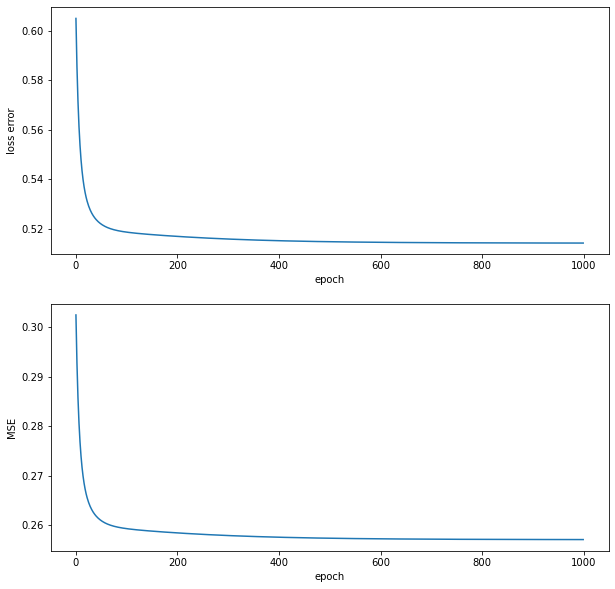

In [5]:
clf = Perceptron(act=sigmoid, act_d=sigmoid_d)
clf.fit(X, y, 1000, export=f'mse.png')

# OR

In [6]:
# These are XOR inputs
X=np.array([[0,0],[0,1],[1,0], [1, 1]])
# These are XOR outputs
y=np.array([0 , 1 , 1 , 1])

[[7.20324493e-01 1.14374817e-04]]
x[i] [0 0] o:  [0.20554085]
x[i] [0 1] o:  [0.20087747]
x[i] [1 0] o:  [0.52478721]
x[i] [1 1] o:  [0.55068906]
> 0	[0.55427569]
x[i] [0 0] o:  [0.23473646]
x[i] [0 1] o:  [0.25495638]
x[i] [1 0] o:  [0.55644134]
x[i] [1 1] o:  [0.5963384]
> 1	[0.48493908]
x[i] [0 0] o:  [0.25917602]
x[i] [0 1] o:  [0.30057746]
x[i] [1 0] o:  [0.58223803]
x[i] [1 1] o:  [0.6330732]
> 2	[0.43276222]
x[i] [0 0] o:  [0.27981999]
x[i] [0 1] o:  [0.33940075]
x[i] [1 0] o:  [0.6036101]
x[i] [1 1] o:  [0.66313809]
> 3	[0.39264575]
x[i] [0 0] o:  [0.29740365]
x[i] [0 1] o:  [0.37273727]
x[i] [1 0] o:  [0.62157476]
x[i] [1 1] o:  [0.6881262]
> 4	[0.3611892]
x[i] [0 0] o:  [0.31249197]
x[i] [0 1] o:  [0.40161236]
x[i] [1 0] o:  [0.63686717]
x[i] [1 1] o:  [0.70918341]
> 5	[0.33607937]
x[i] [0 0] o:  [0.32552269]
x[i] [0 1] o:  [0.42682797]
x[i] [1 0] o:  [0.65002868]
x[i] [1 1] o:  [0.7271473]
> 6	[0.31570986]
x[i] [0 0] o:  [0.33683846]
x[i] [0 1] o:  [0.44901444]
x[i] [1 0] o:

x[i] [0 1] o:  [0.73506415]
x[i] [1 0] o:  [0.78370152]
x[i] [1 1] o:  [0.93220183]
> 95	[0.11267663]
x[i] [0 0] o:  [0.32047759]
x[i] [0 1] o:  [0.73572106]
x[i] [1 0] o:  [0.78387826]
x[i] [1 1] o:  [0.93268546]
> 96	[0.11189455]
x[i] [0 0] o:  [0.3188109]
x[i] [0 1] o:  [0.73637276]
x[i] [1 0] o:  [0.78405583]
x[i] [1 1] o:  [0.9331639]
> 97	[0.11111933]
x[i] [0 0] o:  [0.31715019]
x[i] [0 1] o:  [0.73701945]
x[i] [1 0] o:  [0.78423432]
x[i] [1 1] o:  [0.93363725]
> 98	[0.11035093]
x[i] [0 0] o:  [0.31549567]
x[i] [0 1] o:  [0.73766133]
x[i] [1 0] o:  [0.78441382]
x[i] [1 1] o:  [0.93410563]
> 99	[0.10958928]
x[i] [0 0] o:  [0.31384754]
x[i] [0 1] o:  [0.73829858]
x[i] [1 0] o:  [0.78459441]
x[i] [1 1] o:  [0.93456914]
> 100	[0.10883434]
x[i] [0 0] o:  [0.31220599]
x[i] [0 1] o:  [0.73893138]
x[i] [1 0] o:  [0.78477616]
x[i] [1 1] o:  [0.93502789]
> 101	[0.10808604]
x[i] [0 0] o:  [0.3105712]
x[i] [0 1] o:  [0.73955989]
x[i] [1 0] o:  [0.78495913]
x[i] [1 1] o:  [0.93548196]
> 102	[

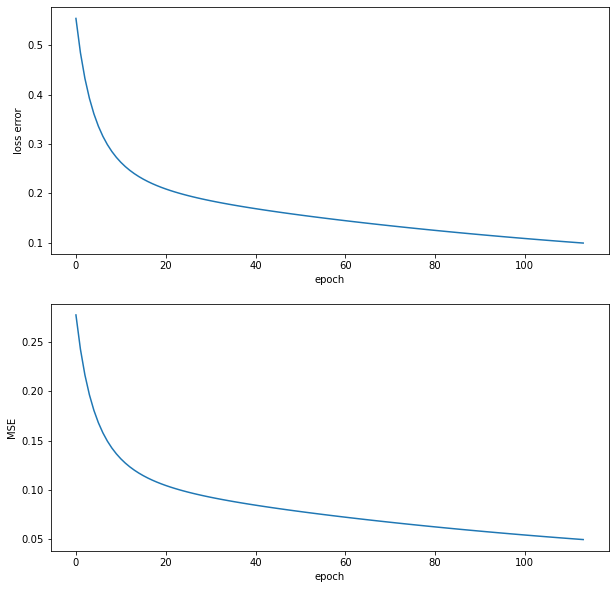

In [7]:
clf = Perceptron(act=sigmoid, act_d=sigmoid_d)
clf.fit(X, y, 1000, export=f'mse.png')

# AND

In [8]:
# These are XOR inputs
X=np.array([[0,0],[0,1],[1,0], [1, 1]])
# These are XOR outputs
y=np.array([0 , 0 , 0 , 1])

[[7.20324493e-01 1.14374817e-04]]
x[i] [0 0] o:  [0.20554085]
x[i] [0 1] o:  [0.20087747]
x[i] [1 0] o:  [0.50718498]
x[i] [1 1] o:  [0.48944824]
> 0	[0.30024925]
x[i] [0 0] o:  [0.19647025]
x[i] [0 1] o:  [0.19668352]
x[i] [1 0] o:  [0.50056501]
x[i] [1 1] o:  [0.48654203]
> 1	[0.29574469]
x[i] [0 0] o:  [0.18777383]
x[i] [0 1] o:  [0.19306096]
x[i] [1 0] o:  [0.49429096]
x[i] [1 1] o:  [0.48416848]
> 2	[0.29146863]
x[i] [0 0] o:  [0.17942437]
x[i] [0 1] o:  [0.18995229]
x[i] [1 0] o:  [0.48833643]
x[i] [1 1] o:  [0.48227378]
> 3	[0.28739394]
x[i] [0 0] o:  [0.1713963]
x[i] [0 1] o:  [0.18730445]
x[i] [1 0] o:  [0.48267621]
x[i] [1 1] o:  [0.48080767]
> 4	[0.28349832]
x[i] [0 0] o:  [0.16366581]
x[i] [0 1] o:  [0.1850688]
x[i] [1 0] o:  [0.47728651]
x[i] [1 1] o:  [0.47972369]
> 5	[0.2797634]
x[i] [0 0] o:  [0.15621083]
x[i] [0 1] o:  [0.18320102]
x[i] [1 0] o:  [0.47214513]
x[i] [1 1] o:  [0.4789792]
> 6	[0.27617407]
x[i] [0 0] o:  [0.14901111]
x[i] [0 1] o:  [0.18166089]
x[i] [1 0] 

x[i] [0 1] o:  [0.22276921]
x[i] [1 0] o:  [0.30223944]
x[i] [1 1] o:  [0.56169019]
> 83	[0.1735226]
x[i] [0 0] o:  [-0.11985209]
x[i] [0 1] o:  [0.22324724]
x[i] [1 0] o:  [0.30125775]
x[i] [1 1] o:  [0.56247908]
> 84	[0.17319232]
x[i] [0 0] o:  [-0.12154728]
x[i] [0 1] o:  [0.22371721]
x[i] [1 0] o:  [0.30029345]
x[i] [1 1] o:  [0.56325745]
> 85	[0.17287167]
x[i] [0 0] o:  [-0.12321691]
x[i] [0 1] o:  [0.2241792]
x[i] [1 0] o:  [0.29934624]
x[i] [1 1] o:  [0.56402542]
> 86	[0.17256036]
x[i] [0 0] o:  [-0.12486143]
x[i] [0 1] o:  [0.22463331]
x[i] [1 0] o:  [0.29841582]
x[i] [1 1] o:  [0.56478314]
> 87	[0.17225811]
x[i] [0 0] o:  [-0.12648127]
x[i] [0 1] o:  [0.22507961]
x[i] [1 0] o:  [0.29750189]
x[i] [1 1] o:  [0.56553072]
> 88	[0.17196464]
x[i] [0 0] o:  [-0.12807686]
x[i] [0 1] o:  [0.2255182]
x[i] [1 0] o:  [0.29660417]
x[i] [1 1] o:  [0.5662683]
> 89	[0.17167968]
x[i] [0 0] o:  [-0.12964862]
x[i] [0 1] o:  [0.22594916]
x[i] [1 0] o:  [0.29572238]
x[i] [1 1] o:  [0.56699601]
> 9

x[i] [1 0] o:  [0.26417543]
x[i] [1 1] o:  [0.59611874]
> 148	[0.1637072]
x[i] [0 0] o:  [-0.19161473]
x[i] [0 1] o:  [0.24107047]
x[i] [1 0] o:  [0.26386747]
x[i] [1 1] o:  [0.59644973]
> 149	[0.16365502]
x[i] [0 0] o:  [-0.1922887]
x[i] [0 1] o:  [0.24120079]
x[i] [1 0] o:  [0.2635649]
x[i] [1 1] o:  [0.59677641]
> 150	[0.16360424]
x[i] [0 0] o:  [-0.19295374]
x[i] [0 1] o:  [0.24132828]
x[i] [1 0] o:  [0.26326761]
x[i] [1 1] o:  [0.59709885]
> 151	[0.16355483]
x[i] [0 0] o:  [-0.19360998]
x[i] [0 1] o:  [0.24145299]
x[i] [1 0] o:  [0.26297551]
x[i] [1 1] o:  [0.59741711]
> 152	[0.16350674]
x[i] [0 0] o:  [-0.19425755]
x[i] [0 1] o:  [0.24157497]
x[i] [1 0] o:  [0.26268851]
x[i] [1 1] o:  [0.59773124]
> 153	[0.16345993]
x[i] [0 0] o:  [-0.19489656]
x[i] [0 1] o:  [0.24169427]
x[i] [1 0] o:  [0.26240651]
x[i] [1 1] o:  [0.59804129]
> 154	[0.16341439]
x[i] [0 0] o:  [-0.19552716]
x[i] [0 1] o:  [0.24181095]
x[i] [1 0] o:  [0.26212943]
x[i] [1 1] o:  [0.59834733]
> 155	[0.16337005]
x[i]

x[i] [1 0] o:  [0.24871003]
x[i] [1 1] o:  [0.61612265]
> 262	[0.16181964]
x[i] [0 0] o:  [-0.23218921]
x[i] [0 1] o:  [0.24614353]
x[i] [1 0] o:  [0.24866545]
x[i] [1 1] o:  [0.61620168]
> 263	[0.16181706]
x[i] [0 0] o:  [-0.23234957]
x[i] [0 1] o:  [0.24614805]
x[i] [1 0] o:  [0.24862158]
x[i] [1 1] o:  [0.61627976]
> 264	[0.16181455]
x[i] [0 0] o:  [-0.232508]
x[i] [0 1] o:  [0.24615233]
x[i] [1 0] o:  [0.24857842]
x[i] [1 1] o:  [0.6163569]
> 265	[0.1618121]
x[i] [0 0] o:  [-0.23266452]
x[i] [0 1] o:  [0.2461564]
x[i] [1 0] o:  [0.24853594]
x[i] [1 1] o:  [0.6164331]
> 266	[0.16180972]
x[i] [0 0] o:  [-0.23281915]
x[i] [0 1] o:  [0.24616026]
x[i] [1 0] o:  [0.24849415]
x[i] [1 1] o:  [0.61650839]
> 267	[0.16180739]
x[i] [0 0] o:  [-0.23297193]
x[i] [0 1] o:  [0.2461639]
x[i] [1 0] o:  [0.24845302]
x[i] [1 1] o:  [0.61658277]
> 268	[0.16180513]
x[i] [0 0] o:  [-0.23312288]
x[i] [0 1] o:  [0.24616734]
x[i] [1 0] o:  [0.24841255]
x[i] [1 1] o:  [0.61665625]
> 269	[0.16180293]
x[i] [0 

x[i] [1 1] o:  [0.62001522]
> 336	[0.16173597]
x[i] [0 0] o:  [-0.24009641]
x[i] [0 1] o:  [0.24613448]
x[i] [1 0] o:  [0.24673686]
x[i] [1 1] o:  [0.62004772]
> 337	[0.16173564]
x[i] [0 0] o:  [-0.24016254]
x[i] [0 1] o:  [0.24613215]
x[i] [1 0] o:  [0.24672301]
x[i] [1 1] o:  [0.62007985]
> 338	[0.16173532]
x[i] [0 0] o:  [-0.24022788]
x[i] [0 1] o:  [0.24612981]
x[i] [1 0] o:  [0.24670936]
x[i] [1 1] o:  [0.62011159]
> 339	[0.16173502]
x[i] [0 0] o:  [-0.24029246]
x[i] [0 1] o:  [0.24612745]
x[i] [1 0] o:  [0.24669592]
x[i] [1 1] o:  [0.62014296]
> 340	[0.16173472]
x[i] [0 0] o:  [-0.24035628]
x[i] [0 1] o:  [0.24612507]
x[i] [1 0] o:  [0.24668268]
x[i] [1 1] o:  [0.62017396]
> 341	[0.16173443]
x[i] [0 0] o:  [-0.24041934]
x[i] [0 1] o:  [0.24612269]
x[i] [1 0] o:  [0.24666963]
x[i] [1 1] o:  [0.62020459]
> 342	[0.16173415]
x[i] [0 0] o:  [-0.24048166]
x[i] [0 1] o:  [0.24612029]
x[i] [1 0] o:  [0.24665677]
x[i] [1 1] o:  [0.62023486]
> 343	[0.16173388]
x[i] [0 0] o:  [-0.24054325]


x[i] [0 0] o:  [-0.24323382]
x[i] [0 1] o:  [0.24597207]
x[i] [1 0] o:  [0.24613175]
x[i] [1 1] o:  [0.62157086]
> 406	[0.1617272]
x[i] [0 0] o:  [-0.2432631]
x[i] [0 1] o:  [0.24597]
x[i] [1 0] o:  [0.24612666]
x[i] [1 1] o:  [0.62158506]
> 407	[0.16172719]
x[i] [0 0] o:  [-0.24329203]
x[i] [0 1] o:  [0.24596795]
x[i] [1 0] o:  [0.24612164]
x[i] [1 1] o:  [0.6215991]
> 408	[0.16172717]
x[i] [0 0] o:  [-0.24332063]
x[i] [0 1] o:  [0.24596591]
x[i] [1 0] o:  [0.24611668]
x[i] [1 1] o:  [0.62161297]
> 409	[0.16172716]
x[i] [0 0] o:  [-0.24334889]
x[i] [0 1] o:  [0.24596388]
x[i] [1 0] o:  [0.2461118]
x[i] [1 1] o:  [0.62162668]
> 410	[0.16172715]
x[i] [0 0] o:  [-0.24337682]
x[i] [0 1] o:  [0.24596187]
x[i] [1 0] o:  [0.24610698]
x[i] [1 1] o:  [0.62164023]
> 411	[0.16172714]
x[i] [0 0] o:  [-0.24340442]
x[i] [0 1] o:  [0.24595987]
x[i] [1 0] o:  [0.24610223]
x[i] [1 1] o:  [0.62165362]
> 412	[0.16172713]
x[i] [0 0] o:  [-0.2434317]
x[i] [0 1] o:  [0.24595788]
x[i] [1 0] o:  [0.24609755]

x[i] [0 1] o:  [0.24585555]
x[i] [1 0] o:  [0.24589539]
x[i] [1 1] o:  [0.62227085]
> 479	[0.16172787]
x[i] [0 0] o:  [-0.24468961]
x[i] [0 1] o:  [0.2458544]
x[i] [1 0] o:  [0.2458935]
x[i] [1 1] o:  [0.62227688]
> 480	[0.16172788]
x[i] [0 0] o:  [-0.2447019]
x[i] [0 1] o:  [0.24585327]
x[i] [1 0] o:  [0.24589164]
x[i] [1 1] o:  [0.62228283]
> 481	[0.1617279]
x[i] [0 0] o:  [-0.24471403]
x[i] [0 1] o:  [0.24585214]
x[i] [1 0] o:  [0.2458898]
x[i] [1 1] o:  [0.62228871]
> 482	[0.16172792]
x[i] [0 0] o:  [-0.24472603]
x[i] [0 1] o:  [0.24585103]
x[i] [1 0] o:  [0.24588798]
x[i] [1 1] o:  [0.62229453]
> 483	[0.16172794]
x[i] [0 0] o:  [-0.24473788]
x[i] [0 1] o:  [0.24584992]
x[i] [1 0] o:  [0.24588619]
x[i] [1 1] o:  [0.62230028]
> 484	[0.16172796]
x[i] [0 0] o:  [-0.2447496]
x[i] [0 1] o:  [0.24584883]
x[i] [1 0] o:  [0.24588442]
x[i] [1 1] o:  [0.62230596]
> 485	[0.16172798]
x[i] [0 0] o:  [-0.24476118]
x[i] [0 1] o:  [0.24584775]
x[i] [1 0] o:  [0.24588267]
x[i] [1 1] o:  [0.62231157

x[i] [1 0] o:  [0.2457897]
x[i] [1 1] o:  [0.62262394]
> 577	[0.1617293]
x[i] [0 0] o:  [-0.24540961]
x[i] [0 1] o:  [0.2457828]
x[i] [1 0] o:  [0.24578916]
x[i] [1 1] o:  [0.62262585]
> 578	[0.16172931]
x[i] [0 0] o:  [-0.24541351]
x[i] [0 1] o:  [0.24578238]
x[i] [1 0] o:  [0.24578863]
x[i] [1 1] o:  [0.62262774]
> 579	[0.16172932]
x[i] [0 0] o:  [-0.24541737]
x[i] [0 1] o:  [0.24578196]
x[i] [1 0] o:  [0.2457881]
x[i] [1 1] o:  [0.62262961]
> 580	[0.16172933]
x[i] [0 0] o:  [-0.24542117]
x[i] [0 1] o:  [0.24578155]
x[i] [1 0] o:  [0.24578758]
x[i] [1 1] o:  [0.62263146]
> 581	[0.16172934]
x[i] [0 0] o:  [-0.24542494]
x[i] [0 1] o:  [0.24578115]
x[i] [1 0] o:  [0.24578706]
x[i] [1 1] o:  [0.62263328]
> 582	[0.16172935]
x[i] [0 0] o:  [-0.24542866]
x[i] [0 1] o:  [0.24578074]
x[i] [1 0] o:  [0.24578656]
x[i] [1 1] o:  [0.62263508]
> 583	[0.16172936]
x[i] [0 0] o:  [-0.24543234]
x[i] [0 1] o:  [0.24578035]
x[i] [1 0] o:  [0.24578606]
x[i] [1 1] o:  [0.62263686]
> 584	[0.16172937]
x[i] 

x[i] [0 1] o:  [0.24576216]
x[i] [1 0] o:  [0.245764]
x[i] [1 1] o:  [0.62271668]
> 648	[0.1617298]
x[i] [0 0] o:  [-0.24559877]
x[i] [0 1] o:  [0.24576197]
x[i] [1 0] o:  [0.24576377]
x[i] [1 1] o:  [0.62271751]
> 649	[0.16172981]
x[i] [0 0] o:  [-0.24560047]
x[i] [0 1] o:  [0.24576178]
x[i] [1 0] o:  [0.24576355]
x[i] [1 1] o:  [0.62271833]
> 650	[0.16172981]
x[i] [0 0] o:  [-0.24560215]
x[i] [0 1] o:  [0.24576159]
x[i] [1 0] o:  [0.24576333]
x[i] [1 1] o:  [0.62271915]
> 651	[0.16172982]
x[i] [0 0] o:  [-0.24560381]
x[i] [0 1] o:  [0.2457614]
x[i] [1 0] o:  [0.24576311]
x[i] [1 1] o:  [0.62271995]
> 652	[0.16172982]
x[i] [0 0] o:  [-0.24560545]
x[i] [0 1] o:  [0.24576121]
x[i] [1 0] o:  [0.2457629]
x[i] [1 1] o:  [0.62272075]
> 653	[0.16172982]
x[i] [0 0] o:  [-0.24560707]
x[i] [0 1] o:  [0.24576103]
x[i] [1 0] o:  [0.24576268]
x[i] [1 1] o:  [0.62272153]
> 654	[0.16172983]
x[i] [0 0] o:  [-0.24560868]
x[i] [0 1] o:  [0.24576085]
x[i] [1 0] o:  [0.24576247]
x[i] [1 1] o:  [0.6227223

x[i] [0 1] o:  [0.2457521]
x[i] [1 0] o:  [0.24575261]
x[i] [1 1] o:  [0.62275922]
> 725	[0.16173005]
x[i] [0 0] o:  [-0.24568556]
x[i] [0 1] o:  [0.24575202]
x[i] [1 0] o:  [0.24575252]
x[i] [1 1] o:  [0.62275956]
> 726	[0.16173005]
x[i] [0 0] o:  [-0.24568625]
x[i] [0 1] o:  [0.24575194]
x[i] [1 0] o:  [0.24575243]
x[i] [1 1] o:  [0.62275989]
> 727	[0.16173005]
x[i] [0 0] o:  [-0.24568693]
x[i] [0 1] o:  [0.24575186]
x[i] [1 0] o:  [0.24575234]
x[i] [1 1] o:  [0.62276022]
> 728	[0.16173005]
x[i] [0 0] o:  [-0.24568761]
x[i] [0 1] o:  [0.24575178]
x[i] [1 0] o:  [0.24575226]
x[i] [1 1] o:  [0.62276055]
> 729	[0.16173006]
x[i] [0 0] o:  [-0.24568827]
x[i] [0 1] o:  [0.24575171]
x[i] [1 0] o:  [0.24575217]
x[i] [1 1] o:  [0.62276087]
> 730	[0.16173006]
x[i] [0 0] o:  [-0.24568893]
x[i] [0 1] o:  [0.24575163]
x[i] [1 0] o:  [0.24575209]
x[i] [1 1] o:  [0.62276119]
> 731	[0.16173006]
x[i] [0 0] o:  [-0.24568958]
x[i] [0 1] o:  [0.24575155]
x[i] [1 0] o:  [0.245752]
x[i] [1 1] o:  [0.62276

x[i] [1 1] o:  [0.62277876]
> 820	[0.16173017]
x[i] [0 0] o:  [-0.24572542]
x[i] [0 1] o:  [0.24574735]
x[i] [1 0] o:  [0.24574746]
x[i] [1 1] o:  [0.62277887]
> 821	[0.16173017]
x[i] [0 0] o:  [-0.24572565]
x[i] [0 1] o:  [0.24574732]
x[i] [1 0] o:  [0.24574743]
x[i] [1 1] o:  [0.62277898]
> 822	[0.16173017]
x[i] [0 0] o:  [-0.24572588]
x[i] [0 1] o:  [0.24574729]
x[i] [1 0] o:  [0.2457474]
x[i] [1 1] o:  [0.62277909]
> 823	[0.16173017]
x[i] [0 0] o:  [-0.2457261]
x[i] [0 1] o:  [0.24574727]
x[i] [1 0] o:  [0.24574737]
x[i] [1 1] o:  [0.6227792]
> 824	[0.16173017]
x[i] [0 0] o:  [-0.24572632]
x[i] [0 1] o:  [0.24574724]
x[i] [1 0] o:  [0.24574735]
x[i] [1 1] o:  [0.6227793]
> 825	[0.16173017]
x[i] [0 0] o:  [-0.24572654]
x[i] [0 1] o:  [0.24574721]
x[i] [1 0] o:  [0.24574732]
x[i] [1 1] o:  [0.62277941]
> 826	[0.16173017]
x[i] [0 0] o:  [-0.24572675]
x[i] [0 1] o:  [0.24574719]
x[i] [1 0] o:  [0.24574729]
x[i] [1 1] o:  [0.62277951]
> 827	[0.16173017]
x[i] [0 0] o:  [-0.24572696]
x[i]

x[i] [0 0] o:  [-0.24573801]
x[i] [0 1] o:  [0.24574585]
x[i] [1 0] o:  [0.24574588]
x[i] [1 1] o:  [0.62278497]
> 909	[0.1617302]
x[i] [0 0] o:  [-0.24573809]
x[i] [0 1] o:  [0.24574584]
x[i] [1 0] o:  [0.24574587]
x[i] [1 1] o:  [0.62278501]
> 910	[0.1617302]
x[i] [0 0] o:  [-0.24573817]
x[i] [0 1] o:  [0.24574583]
x[i] [1 0] o:  [0.24574586]
x[i] [1 1] o:  [0.62278505]
> 911	[0.16173021]
x[i] [0 0] o:  [-0.24573825]
x[i] [0 1] o:  [0.24574582]
x[i] [1 0] o:  [0.24574585]
x[i] [1 1] o:  [0.62278508]
> 912	[0.16173021]
x[i] [0 0] o:  [-0.24573833]
x[i] [0 1] o:  [0.24574581]
x[i] [1 0] o:  [0.24574584]
x[i] [1 1] o:  [0.62278512]
> 913	[0.16173021]
x[i] [0 0] o:  [-0.2457384]
x[i] [0 1] o:  [0.2457458]
x[i] [1 0] o:  [0.24574583]
x[i] [1 1] o:  [0.62278516]
> 914	[0.16173021]
x[i] [0 0] o:  [-0.24573848]
x[i] [0 1] o:  [0.24574579]
x[i] [1 0] o:  [0.24574582]
x[i] [1 1] o:  [0.6227852]
> 915	[0.16173021]
x[i] [0 0] o:  [-0.24573856]
x[i] [0 1] o:  [0.24574578]
x[i] [1 0] o:  [0.245745

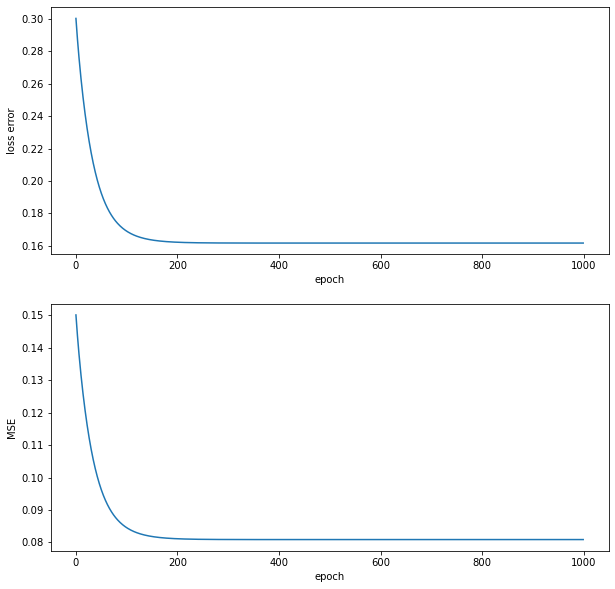

In [9]:
clf = Perceptron(act=sigmoid, act_d=sigmoid_d)
clf.fit(X, y, 1000, export=f'mse.png')